In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_csv('pokemon.csv')

In [3]:
df.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


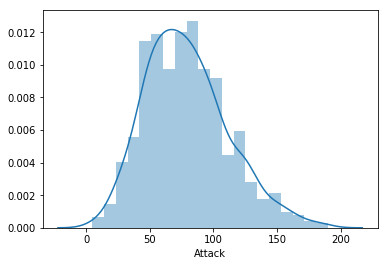

In [7]:
sns.distplot(df['Attack'])

In [65]:
df.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [117]:
X = df[['Total', 'HP', 'Defense', 'Speed', 'Sp. Def']]

In [118]:
y = df['Attack']

In [119]:
from sklearn.cross_validation import train_test_split

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [121]:
from sklearn.linear_model import LinearRegression

In [122]:
lr = LinearRegression()

In [123]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [124]:
lr.coef_

array([ 0.49460986, -0.36987491, -0.24476873, -0.47882951, -0.82041147])

In [125]:
X_train.columns

Index(['Total', 'HP', 'Defense', 'Speed', 'Sp. Def'], dtype='object')

In [126]:
lr.score(X_train,y_train)

0.7595590407894516

In [127]:
predictions = lr.predict(X_test)

In [128]:
cdf = pd.DataFrame(lr.coef_, X.columns,columns=["Coeff"])

In [129]:
cdf

,Coeff
Total,0.494610
HP,-0.369875
Defense,-0.244769
Speed,-0.478830
Sp. Def,-0.820411


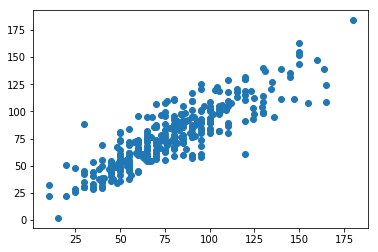

In [174]:
plt.scatter(y_test, predictions)

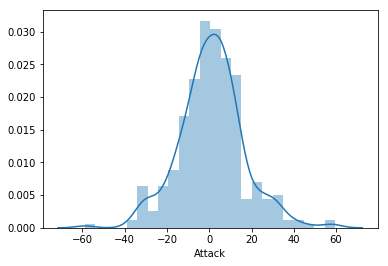

In [131]:
sns.distplot((y_test-predictions))

In [132]:
lr.score(X_train, y_train)

0.7595590407894516

In [133]:
lr.score(X_test,y_test)

0.7441703622348299

In [135]:
from sklearn import metrics
metrics.mean_squared_error(y_test,predictions)

242.71025173504592

In [137]:
np.sqrt(metrics.mean_squared_error(y_test,predictions))

15.579160816136596

In [140]:
lr.predict([[200,150,100,100,50]])

array([-71.22060771])